In [1]:
import sys
print(sys.prefix, sys.version)

C:\Anaconda3\envs\py36 3.6.3 |Anaconda, Inc.| (default, Nov  8 2017, 15:10:56) [MSC v.1900 64 bit (AMD64)]


In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import rpy2
rpy2.__version__

'2.9.0'

In [4]:
from rpy2.rinterface import R_VERSION_BUILD
R_VERSION_BUILD

('3', '4.2', '', 73368)

In [5]:
from rpy2 import robjects as ro
from rpy2.robjects import r as r
from rpy2.robjects import globalenv as rge
from rpy2.robjects.packages import importr

In [6]:
r('''
# create a function `f`
f <- function(r, verbose=FALSE) {
    if (verbose) {
        cat("I am calling f().\n")
    }
    2 * pi * r
}
# call the function `f` with argument value 3
f(3)
''')

18.849556


In [7]:
r.f(3)

18.849556


In [8]:
rge['f']

R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x0000003988A1AE08 / R:0x000000398D1CEE00>

In [9]:
rge['f'](3)

18.849556


In [10]:
letters = r['letters']
rcode = 'paste(%s, collapse="-")' % letters.r_repr()
res = r(rcode)
print(res)
res

[1] "a-b-c-d-e-f-g-h-i-j-k-l-m-n-o-p-q-r-s-t-u-v-w-x-y-z"



'a-b-c-d-e-f-g-h-i-j-k-l-m-n-o-p-q-r-s-t-u-v-w-x-...


In [11]:
res = ro.StrVector(['abc', 'def'])
print(res.r_repr())
res = ro.IntVector([1, 2, 3])
print(res.r_repr())
res = ro.FloatVector([1.1, 2.2, 3.3])
print(res.r_repr())

c("abc", "def")
1:3
c(1.1, 2.2, 3.3)


In [12]:
v = ro.FloatVector([1.1, 2.2, 3.3, 4.4, 5.5, 6.6])
m = r.matrix(v, nrow = 2)
print(m)

     [,1] [,2] [,3]

[1,]  1.1  3.3  5.5

[2,]  2.2  4.4  6.6



In [13]:
r.sum(ro.IntVector([1,2,3]))[0]

6

In [14]:
res = r.sort(ro.IntVector([1,2,3]), decreasing=True)
print(res.r_repr())
res

c(3L, 2L, 1L)


3,2,1


## Linear models

```r
ctl <- c(4.17,5.58,5.18,6.11,4.50,4.61,5.17,4.53,5.33,5.14)
trt <- c(4.81,4.17,4.41,3.59,5.87,3.83,6.03,4.89,4.32,4.69)
group <- gl(2, 10, 20, labels = c("Ctl","Trt"))
weight <- c(ctl, trt)

anova(lm.D9 <- lm(weight ~ group))

summary(lm.D90 <- lm(weight ~ group - 1))# omitting intercept
```

In [15]:
from rpy2 import robjects as ro
from rpy2.robjects import globalenv as rgenv
from rpy2.robjects import FloatVector
from rpy2.robjects.packages import importr

stats = importr('stats')
base = importr('base')

ctl = FloatVector([4.17,5.58,5.18,6.11,4.50,4.61,5.17,4.53,5.33,5.14])
trt = FloatVector([4.81,4.17,4.41,3.59,5.87,3.83,6.03,4.89,4.32,4.69])
group = base.gl(2, 10, 20, labels = ["Ctl","Trt"])
weight = ctl + trt

rgenv["weight"] = weight
rgenv["group"] = group
lm_D9 = stats.lm("weight ~ group")

# omitting the intercept
lm_D90 = stats.lm("weight ~ group - 1")
#print(stats.anova(lm_D9), sep='', end='')
#print(base.summary(lm_D90))

In [16]:
lm_D9

R object with classes: ('lm',) mapped to:
<ListVector - Python:0x000000398FC31288 / R:0x000000398FDB79D0>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]
  coefficients: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000000398DA29088 / R:0x000000398FD9EE00>
[5.032000, -0.371000]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000000398E00D5C8 / R:0x000000398FDA49E8>
[-0.862000, 0.548000, 0.148000, 1.078000, ..., 1.369000, 0.229000, -0.341000, 0.029000]
  effects: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000000398E00D508 / R:0x000000398FDA4AB8>
[-21.674207, -0.829581, 0.196516, 1.126516, ..., 1.684286, 0.544286, -0.025714, 0.344286]
  rank: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x000000398E00D7C8 / R:0x000000398FDA2548>
[2]
...
R object with classes: ('lm',) mapped to:
<ListVector - Python:0x000000398FC31288 / R:0x000000398FDB79D0>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]
  qr: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('lm',) mapped to:
<Vector - Python:0x000000398FC02088 / R:0x000000398FD58240>
[SignatureTranslatedFunc..., StrVector]
  df.residual: <class 'rpy2.robjects.Formula'>
  R object with classes: ('terms', 'formula') mapped to:
<Formula - Python:0x000000398DA11D48 / R:0x000000398FD80190>
R object with classes: ('lm',) mapped to:
<ListVector - Python:0x000000398FC31288 / R:0x000000398FDB79D0>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]

In [17]:
lm_D90

R object with classes: ('lm',) mapped to:
<ListVector - Python:0x000000398FC31508 / R:0x000000398FE15728>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]
  coefficients: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000000398DA11AC8 / R:0x000000398FDF17D8>
[5.032000, 4.661000]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000000398E00D508 / R:0x000000398FE02890>
[-0.862000, 0.548000, 0.148000, 1.078000, ..., 1.369000, 0.229000, -0.341000, 0.029000]
  effects: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000000398FC22988 / R:0x000000398FE02960>
[-15.912581, -14.739376, 0.355098, 1.285098, ..., 1.130217, -0.009783, -0.579783, -0.209783]
  rank: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x000000398FC22B08 / R:0x000000398FDFDA18>
[2]
...
R object with classes: ('lm',) mapped to:
<ListVector - Python:0x000000398FC31508 / R:0x000000398FE15728>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]
  qr: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('lm',) mapped to:
<Vector - Python:0x000000398FC22E88 / R:0x000000398FDB8438>
[SignatureTranslatedFunc..., StrVector]
  df.residual: <class 'rpy2.robjects.Formula'>
  R object with classes: ('terms', 'formula') mapped to:
<Formula - Python:0x000000398FBBA188 / R:0x000000398FDE0938>
R object with classes: ('lm',) mapped to:
<ListVector - Python:0x000000398FC31508 / R:0x000000398FE15728>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]

In [18]:
print(lm_D9.rclass[0])

lm


In [19]:
print(lm_D9.names)

 [1] "coefficients"  "residuals"     "effects"       "rank"         

 [5] "fitted.values" "assign"        "qr"            "df.residual"  

 [9] "contrasts"     "xlevels"       "call"          "terms"        

[13] "model"        



In [20]:
print(lm_D9.rx2('coefficients'))

(Intercept)    groupTrt 

      5.032      -0.371 



## One more example

In [21]:
from rpy2.robjects.packages import importr
graphics = importr('graphics')
grdevices = importr('grDevices')
base = importr('base')
stats = importr('stats')

import array

x = array.array('i', range(10))
y = stats.rnorm(10)

grdevices.X11()

graphics.par(mfrow = array.array('i', [2,2]))
graphics.plot(x, y, ylab = "foo/bar", col = "red")

kwargs = {'ylab':"foo/bar", 'type':"b", 'col':"blue", 'log':"x"}
graphics.plot(x, y, **kwargs)


m = base.matrix(stats.rnorm(100), ncol=5)
pca = stats.princomp(m)
graphics.plot(pca, main="Eigen values")
stats.biplot(pca, main="biplot")

rpy2.rinterface.NULL

In [22]:
_ = grdevices.dev_off()

### Rmagic

https://ipython.org/ipython-doc/2/config/extensions/rmagic.html

In [23]:
%load_ext rmagic

C:\Anaconda3\envs\py36\lib\site-packages\IPython\extensions\rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


In [24]:
%%R
Y = c(2,4,3,9)
summary(lm(Y~X))

ERROR:root:Cell magic `%%R` not found.


### Process interactive events

https://rpy2.readthedocs.io/en/version_2.8.x/introduction.html#graphics-and-plots

By default, the embedded R open an interactive plotting device, that is a window in which the plot is located. Processing interactive events on that devices, such as resizing or closing the window must be explicitly required.

https://rpy2.readthedocs.io/en/version_2.8.x/rinterface.html#rinterface-interactive-processevents

An interactive R session is can start interactive activities that require a continuous monitoring for events. A typical example is the interactive graphical devices (plotting windows), as they can be resized and the information they display is refreshed.

However, to do so the R process must be instructed to process pending interactive events. This is done by the R console for example, but rpy2 is designed as a library rather than a threaded R process running within Python (yet this can be done as shown below).

The way to restore interactivity is to simply call the function `rinterface.process_revents()` at regular intervals.

https://rpy2.readthedocs.io/en/version_2.8.x/interactive.html#interactive-reventloop

In order to perform operations like refreshing interactive graphical devices, R need to process the events triggering the refresh.

    from rpy2.interactive import process_revents
    process_revents.start()

    from rpy2.robjects.packages import importr
    from rpy2.robjects.vectors import IntVector
    graphics = importr("graphics")
    graphics.barplot(IntVector((1,3,2,5,4)), ylab="Value")

Now the R graphical device is updated when resized. Should one wish to stop processing the events:

    process_revents.stop()

### Graphics: General setup

In [25]:
# Close graphics
from rpy2.interactive import process_revents
from rpy2.robjects.lib import grdevices as gr_devices

def rgraphics_close():
    try:
        process_revents.stop()
    except:
        pass
    try:
        gr_devices.dev_off()
    except:
        pass

def rgraphics_events():
    rgraphics_close()
    process_revents.start()
    return process_revents.EventProcessor.interval

C:\Anaconda3\envs\py36\lib\site-packages\rpy2-2.9.0-py3.6-win-amd64.egg\rpy2\robjects\packages.py:347: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn("The symbol '%s' is not in this R namespace/package." % name)


In [26]:
rgraphics_close()
rgraphics_events()

0.2

In [27]:
# Open graphics

from rpy2 import robjects as ro
from rpy2.robjects import r
from rpy2.robjects import Formula, Environment
from rpy2.robjects.vectors import IntVector, FloatVector
from rpy2.robjects.lib import grid
from rpy2.robjects.packages import importr, data
from rpy2.rinterface import RRuntimeError
import warnings

rprint = ro.globalenv.get("print")  # The R 'print' function
stats = importr('stats')
grdev = importr('grDevices')
base = importr('base')
datasets = importr('datasets')

In [28]:
grid.activate()

----

In [29]:
x = ro.IntVector(range(10))
y = r.rnorm(10)
r.X11()
r.layout(r.matrix(ro.IntVector([1,2,3,2]), nrow=2, ncol=2))
r.plot(r.runif(10), y, xlab="runif", ylab="foo/bar", col="red")

rpy2.rinterface.NULL

In [30]:
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import IntVector
graphics = importr("graphics")
_ = graphics.barplot(IntVector((1,3,2,5,4)), ylab="Value")

In [31]:
lattice = importr('lattice')
xyplot = lattice.xyplot
datasets = importr('datasets')
mtcars = data(datasets).fetch('mtcars')['mtcars']
formula = Formula('mpg ~ wt')
formula.getenvironment()['mpg'] = mtcars.rx2('mpg')
formula.getenvironment()['wt'] = mtcars.rx2('wt')

p = lattice.xyplot(formula)
rprint(p)

R object with classes: ('trellis',) mapped to:
<ListVector - Python:0x00000039911D7F88 / R:0x0000003990B52680>
[Formula, BoolVector, BoolVector, RNULLType, ..., RNULLType, FloatVector, StrVector, RNULLType]
  formula: <class 'rpy2.robjects.Formula'>
  R object with classes: ('formula',) mapped to:
<Formula - Python:0x000000399090D548 / R:0x000000398BAED3D0>
  as.table: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x0000003990923188 / R:0x0000003991166F00>
[       0]
  aspect.fill: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x0000003990923148 / R:0x000000399096D670>
[       1]
  legend: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL
...
  page: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL
  layout: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000003990ECCEC8 / R:0x000000398FEB8C30>
[1.000000]
  skip: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x000000398DC865C8 / R:0x0000003991170BB0>
['prepanel.default.xyplot']
  strip: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL

In [32]:
p = lattice.xyplot(formula, groups = mtcars.rx2('cyl'))
rprint(p)

R object with classes: ('trellis',) mapped to:
<ListVector - Python:0x0000003990E800C8 / R:0x0000003990986870>
[Formula, BoolVector, BoolVector, RNULLType, ..., RNULLType, FloatVector, StrVector, RNULLType]
  formula: <class 'rpy2.robjects.Formula'>
  R object with classes: ('formula',) mapped to:
<Formula - Python:0x0000003990E80308 / R:0x00000039914D73D8>
  as.table: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x0000003990E80488 / R:0x0000003991166F00>
[       0]
  aspect.fill: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x0000003990E802C8 / R:0x00000039938DE380>
[       1]
  legend: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL
...
  page: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL
  layout: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000003990E80E48 / R:0x00000039939588E0>
[1.000000]
  skip: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x0000003991301A48 / R:0x0000003991170BB0>
['prepanel.default.xyplot']
  strip: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL

In [33]:
p = lattice.bwplot(Formula('mpg ~ factor(cyl) | gear'),
                   data = mtcars, fill = 'grey')
rprint(p, nrow=1)

R object with classes: ('trellis',) mapped to:
<ListVector - Python:0x000000398B3A7BC8 / R:0x000000399040A100>
[Formula, BoolVector, BoolVector, RNULLType, ..., RNULLType, FloatVector, StrVector, RNULLType]
  formula: <class 'rpy2.robjects.Formula'>
  R object with classes: ('formula',) mapped to:
<Formula - Python:0x000000398783C148 / R:0x00000039915F8650>
  as.table: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x00000039911D7B08 / R:0x0000003991166F00>
[       0]
  aspect.fill: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x000000398DB7D3C8 / R:0x00000039908AFD68>
[       1]
  legend: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL
...
  page: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL
  layout: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000003990923248 / R:0x00000039939588E0>
[1.000000]
  skip: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x000000399090D848 / R:0x0000003991170D60>
['prepanel.default.bwplot']
  strip: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL

In [34]:
tmpenv = data(datasets).fetch("volcano")
volcano = tmpenv["volcano"]

p = lattice.wireframe(volcano, shade = True,
                      zlab = "",
                      aspect = FloatVector((61.0/87, 0.4)),
                      light_source = IntVector((10,0,10)))
rprint(p)

R object with classes: ('trellis',) mapped to:
<ListVector - Python:0x00000039911D7A88 / R:0x00000039906153A8>
[Formula, BoolVector, BoolVector, StrVector, ..., RNULLType, FloatVector, StrVector, RNULLType]
  formula: <class 'rpy2.robjects.Formula'>
  R object with classes: ('formula',) mapped to:
<Formula - Python:0x000000398E509D88 / R:0x00000039937C5550>
  as.table: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x000000398E509BC8 / R:0x0000003991166F00>
[       0]
  aspect.fill: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x000000398DA47308 / R:0x0000003993DD3668>
[       0]
  panel: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x000000398DA47608 / R:0x0000003991166B70>
['panel.wireframe']
...
  layout: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL
  skip: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000000398B9CB5C8 / R:0x0000003990E34520>
[1.000000]
  strip: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x000000398DA3E448 / R:0x0000003991170B20>
['prepanel.default.cloud']
  strip.left: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL

In [35]:
reshape2 = importr('reshape2')
dataf = reshape2.melt(volcano)
dataf = dataf.cbind(ct = lattice.equal_count(dataf.rx2("value"), number=3, overlap=1/4))
p = lattice.wireframe(Formula('value ~ Var1 * Var2 | ct'), 
                      data = dataf, shade = True,
                      aspect = FloatVector((61.0/87, 0.4)),
                      light_source = IntVector((10,0,10)))
rprint(p, nrow = 1)

R object with classes: ('trellis',) mapped to:
<ListVector - Python:0x000000398EC3DB08 / R:0x000000399060B038>
[Formula, BoolVector, BoolVector, StrVector, ..., RNULLType, FloatVector, StrVector, RNULLType]
  formula: <class 'rpy2.robjects.Formula'>
  R object with classes: ('formula',) mapped to:
<Formula - Python:0x000000398EC3D3C8 / R:0x0000003990D42CD8>
  as.table: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x000000399339FAC8 / R:0x0000003991166F00>
[       0]
  aspect.fill: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x0000003990E84148 / R:0x0000003990278070>
[       0]
  panel: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x0000003990E84D88 / R:0x0000003991166B70>
['panel.wireframe']
...
  layout: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL
  skip: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000003990E84FC8 / R:0x0000003990E34520>
[1.000000]
  strip: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x0000003990E84C08 / R:0x0000003991170B20>
['prepanel.default.cloud']
  strip.left: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL

### Inline graphics in IPython

In [36]:
from IPython.display import display, Image
from rpy2.robjects.vectors import IntVector
from rpy2.robjects.lib import grdevices as gr_devices
from rpy2.robjects.packages import importr

class rgraphics_produce(object):
    def __init__(self, width=1024, height=960, scale=1, res=150, fmt='png'):
        width = int(width * scale)
        height = int(height * scale)
        grdev_fmt = getattr(gr_devices, fmt)
        self.grdev_ctx = gr_devices.render_to_bytesio(grdev_fmt, width=width, height=height, res=res)
        self.fmt = fmt
    def __enter__(self):
        img = self.grdev_ctx.__enter__()
        img._fmt = self.fmt
        return img
    def __exit__(self, exc1, exc2, exc3):
        self.grdev_ctx.__exit__(None, None, None)

def rgraphics_display(img):
    return Image(data=img.getvalue(), format=img._fmt, embed=True)

def rgraphics_plot(obj, *args, **kwargs):
    with rgraphics_produce(*args, **kwargs) as img:
        obj.plot()
    return rgraphics_display(img)

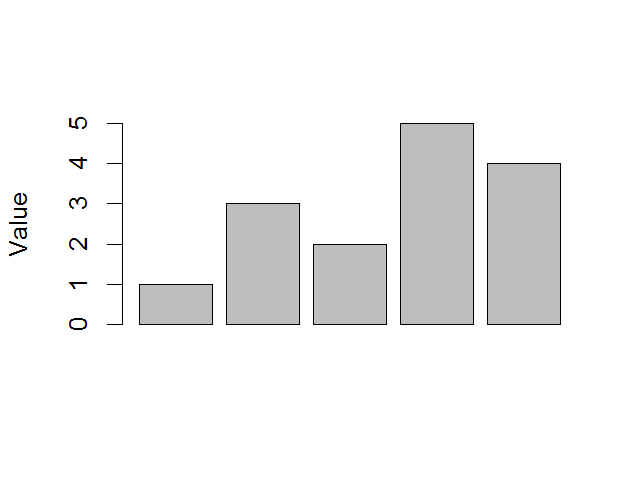

In [37]:
graphics = importr("graphics")
with rgraphics_produce(640, 480, fmt='png') as img:
    graphics.barplot(IntVector((1,3,2,5,4)), ylab="Value")
rgraphics_display(img)

## ggplot2

In [38]:
import math, datetime
import rpy2.robjects.lib.ggplot2 as ggplot2
import rpy2.robjects as robjects
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
base = importr('base')

mtcars = data(datasets).fetch('mtcars')['mtcars']

rnorm = stats.rnorm
dataf_rnorm = robjects.DataFrame({'value': rnorm(300, mean=0) + rnorm(100, mean=3),
                                  'other_value': rnorm(300, mean=0) + rnorm(100, mean=3),
                                  'mean': IntVector([0, ]*300 + [3, ] * 100)})

In [39]:
r.X11()
grid.activate()

In [40]:
gp = ggplot2.ggplot(mtcars)

pp = gp + \
     ggplot2.aes_string(x='wt', y='mpg') + \
     ggplot2.geom_point()

pp.plot()

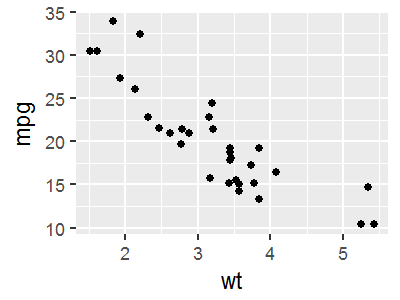

In [41]:
rgraphics_plot(pp, 400, 300)

In [42]:
gp = ggplot2.ggplot(mtcars)

pp = gp + \
     ggplot2.aes_string(x='wt', y='mpg', col='factor(cyl)') + \
     ggplot2.geom_point()

pp.plot()

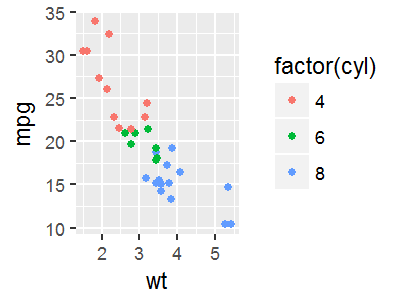

In [43]:
rgraphics_plot(pp, 400, 300)

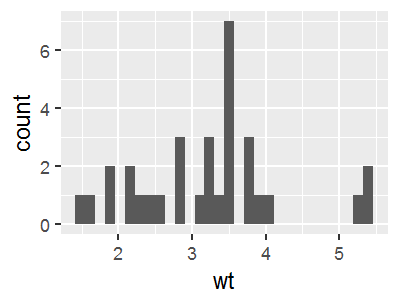

In [44]:
gp = ggplot2.ggplot(mtcars)
pp = gp + \
     ggplot2.aes_string(x='wt') + \
     ggplot2.geom_histogram()
rgraphics_close()
rgraphics_plot(pp, 400,300)

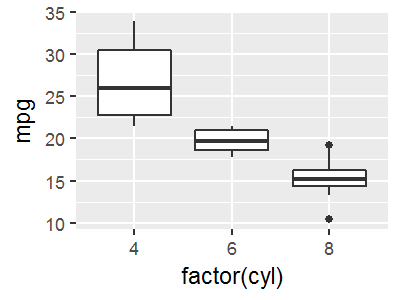

In [45]:
gp = ggplot2.ggplot(mtcars)
pp = gp + \
     ggplot2.aes_string(x='factor(cyl)', y='mpg') + \
     ggplot2.geom_boxplot()
rgraphics_plot(pp, 400,300)

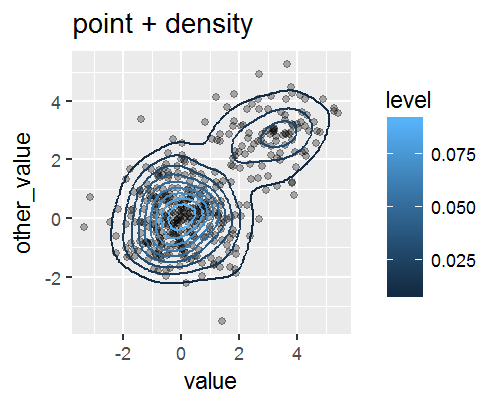

In [46]:
gp = ggplot2.ggplot(dataf_rnorm)
pp = gp + \
     ggplot2.aes_string(x='value', y='other_value') + \
     ggplot2.geom_point(alpha = 0.3) + \
     ggplot2.geom_density2d(ggplot2.aes_string(col = '..level..')) + \
     ggplot2.ggtitle('point + density')
rgraphics_plot(pp, 500,400)

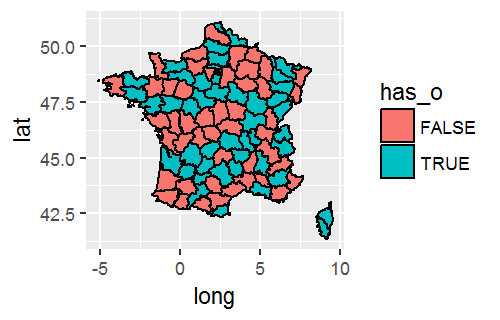

In [47]:
map = importr('maps')
fr = ggplot2.map_data('france')
# add a column indicating which region names have an "o".
fr = fr.cbind(fr, has_o = base.grepl('o', fr.rx2("region"),
                                     ignore_case = True))
p = ggplot2.ggplot(fr) + \
    ggplot2.geom_polygon(ggplot2.aes_string(x = 'long', y = 'lat',
                                            group = 'group', fill = 'has_o'),
                         col="black")
rgraphics_plot(p, 500,320)

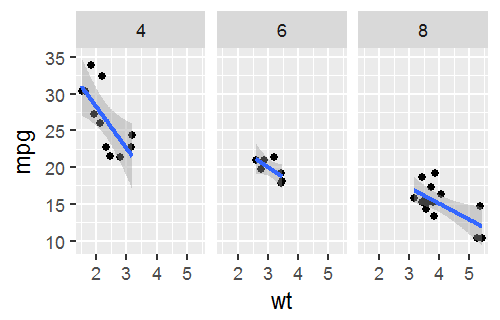

In [48]:
#diamonds = ggplot2.ggplot2.__rdata__.fetch('diamonds')['diamonds']
gp = ggplot2.ggplot(mtcars)
pp = gp + \
     ggplot2.aes_string(x='wt', y='mpg') + \
     ggplot2.geom_point() + \
     ggplot2.facet_grid(ro.Formula('. ~ cyl')) + \
     ggplot2.geom_smooth(ggplot2.aes_string(group="cyl"),
                         method = "lm",
                            data = mtcars)
rgraphics_plot(pp, 500,320)

In [49]:
rgraphics_close()